# Spam Email

### Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv("spam.csv", sep="\t", names=["label", "text"])
df["label"] = df["label"].map({"ham": 0, "spam": 1})
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Converting Text to Features

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["text"])
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

### Training Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

rf_f1 = f1_score(y_test, rf_pred)
rf_f1

0.9090909090909091

### Comparing with Previous Model

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
knn_f1 = f1_score(y_test, knn_pred)

print("KNN F1:", knn_f1)
print("Random Forest F1:", rf_f1)

KNN F1: 0.4878048780487805
Random Forest F1: 0.9090909090909091


### Feature Importance Visualization

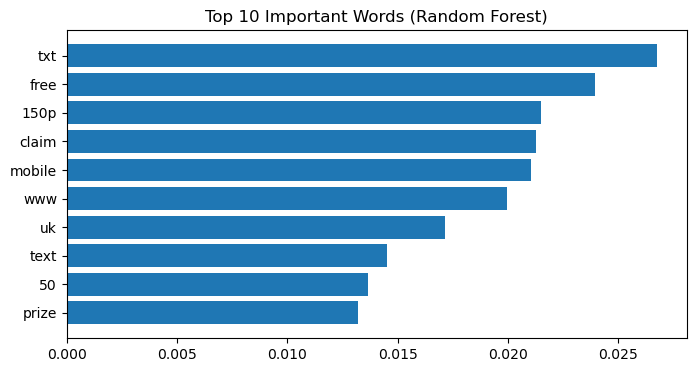

In [5]:
import matplotlib.pyplot as plt
import numpy as np

feature_names = vectorizer.get_feature_names_out()
importances = rf.feature_importances_

indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,4))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), feature_names[indices])
plt.title("Top 10 Important Words (Random Forest)")
plt.show()